In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import time
import datetime
import re
from utilities import Geometry

In [5]:
fname = 'Car_Break_Ins_Clean.csv'
data = pd.read_csv(fname, quotechar='"')

dateformat = '%m/%d/%Y'
ref_date = time.mktime(time.strptime('01/01/2018', dateformat))
p_date = re.compile('(\d{2})/(\d{2})/(\d{4})')
p_time = re.compile('(\d{2}):(\d{2})')

In [7]:
t = []
w = []
m = []
for entry in np.array(data[['Date', 'Time']].as_matrix().astype(str)):
    weekday = datetime.datetime.strptime(entry[0], dateformat).weekday()
    
    date_matches = p_date.match(entry[0])
    time_matches = p_time.match(entry[1])
    
    if int(date_matches.group(1)) == 2 and int(date_matches.group(2)) == 29:
        continue
    
    month = time.mktime(time.strptime('%02i/%02i/2018'%(int(date_matches.group(1)), int(date_matches.group(2))), dateformat))
    
    time_of_day = (float(time_matches.group(1))*60 + float(time_matches.group(2)))/60
    time_of_year = (time_of_day + (month - ref_date)/3600)/24
    time_of_week = (time_of_day + weekday*24)/24

    t.append(time_of_day)
    w.append(weekday)
    m.append(time_of_year)

In [8]:
loc = np.array(data[['X', 'Y']].as_matrix().astype(float))

In [20]:
geom = Geometry()
SF_boundaries_x, SF_boundaries_y = geom.GetSFBoundaries()

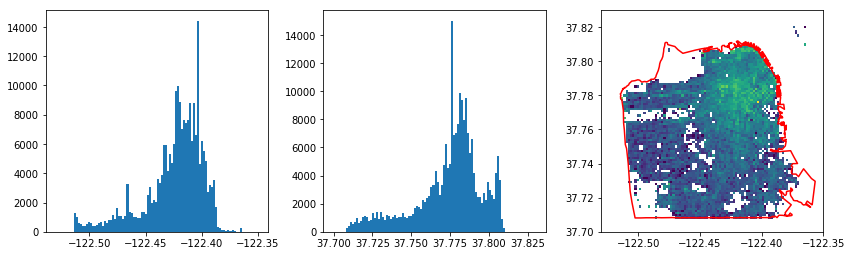

In [22]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))

ax3.hist2d(loc[:,0], loc[:,1],bins=(100,100),range=[[-122.53,-122.35],[37.7,37.83]], norm=LogNorm())
ax3.plot(SF_boundaries_x, SF_boundaries_y, color='red')
ax1.hist(loc[:,0],bins=100,range=[-122.53,-122.35])
ax2.hist(loc[:,1],bins=100,range=[37.7,37.83])

fig.subplots_adjust(left=0.05, right=0.95, bottom=0.11, top=0.88, wspace=0.25, hspace=0.2)

plt.show()